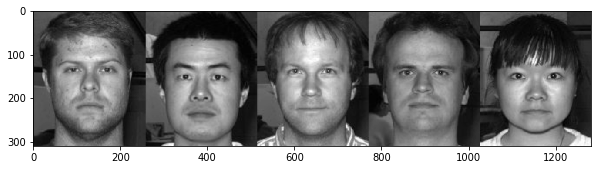

In [9]:
## yale face database B

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
source_image = Image.open("5-faces.png").convert('LA')
source_image = np.array(source_image)
source_image = source_image[:,:,0]
plt.figure(figsize = (10,10))
plt.imshow(source_image,cmap = 'gray')



# break into 5 photos as numpy arrays
im_one = source_image[:,:256]
im_two = source_image[:,256:513]
im_three = source_image[:,513:769]
im_four = source_image[:,769:1025]
im_five = source_image[:,1025:]

#break into images and resize them
img_one = Image.fromarray(im_one[:,:250], 'L')
im_one = img_one.resize((80,100))
img_two = Image.fromarray(im_two[:,:250], 'L')
im_two = img_two.resize((80,100))
img_three = Image.fromarray(im_three[:,:250], 'L')
im_three = img_three.resize((80,100))
img_four = Image.fromarray(im_four[:,:250], 'L')
im_four = img_four.resize((80,100))
img_five = Image.fromarray(im_five[:,:250], 'L')
im_five = img_five.resize((80,100))


# convert back to numpy arrays
img_one  = np.array(im_one)
img_two  = np.array(im_two)
img_three= np.array(im_three)
img_four = np.array(im_four)
img_five = np.array(im_five)

im_one_flat = np.array([img_one.flatten()])
im_two_flat = np.array([img_two.flatten()])
im_three_flat = np.array([img_three.flatten()])
im_four_flat = np.array([img_four.flatten()])
im_five_flat = np.array([img_five.flatten()])

im_stack = np.vstack((im_one_flat,im_two_flat,im_three_flat,im_four_flat,im_five_flat))


plt.show()

In [10]:
# calculate the mean:
X = im_stack.copy() # row vectors

X_hat = np.mean(X,axis = 0) # 

X_centered = X.copy()

#subtract the mean from the matrix to get rid of the DC offset
for i in range(X.shape[0]):
    X_centered[i,:] = np.array([X[i,:]-X_hat])

    
#calcute the covariance matrix of the original X
  # remember Cov(X) = X.T@X == V@S.T@S@V.T

u,s,v_t = np.linalg.svd(X_centered)
eig_vector = v_t.T    

# take the largest eigenvectors out of the 8000 possible
new_basis = eig_vector[:,:8000]

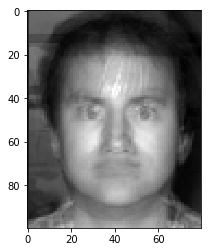

In [48]:
# mean image
#print(X_hat)
mean_image = X_hat[:].reshape(100,80)
plt.imshow(mean_image,cmap = 'gray')
plt.show()
#im_one_flat.shape[1]

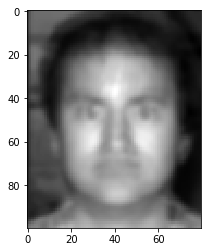

In [17]:
from skimage.filters import gaussian
mean_smoothed = gaussian(mean_image,sigma = 1)
plt.imshow(mean_smoothed,cmap = 'gray')
plt.show()

In [201]:
#project down onto eigenvectors

def eigen_projection(x_mean, image, basis, num_vectors = 100):
    
    assert image.flatten().shape[0] == 8000
    
    # basis is the eigenvector matrix 8000 x 8000
    # image is the image 100 x 80
    
    im = image.flatten()
    im_T = im.T
    u_matrix = [] #scalar values from the image projection onto the eigenvector    
    
    for i in range(num_vectors): # the number of eigenvectors to project onto
        eig_vec = np.array([basis[:,i]])
        u_i = eig_vec@im_T
        u_matrix.extend([u_i])
        
    return u_matrix



def face_of_eig(u,basis,num_vectors,x_mean):
    
    eig_face = x_mean # this is our starting point - still 1x8000 flat vector
    
    for i in range(num_vectors):
        vec_component = u[i]*basis[:,i] #determine the contribution of each eigenvector
        eig_face = eig_face+vec_component #add it to the average face
        
    return eig_face

In [20]:
## More efficient implementation ##


#project down onto eigenvectors
def eigen_projection(image, num_vectors = 100):
    
    assert image.flatten().shape[0] == 8000
    
    u_matrix = image.flatten()[None, :]@new_basis[:, :num_vectors]
    #print(u_matrix.shape)
        
    return u_matrix


def face_of_eig(u,num_vectors,x_mean):
    offset = new_basis[:, :num_vectors]@u.T
    eig_face = x_mean + offset.squeeze()
    
    return eig_face

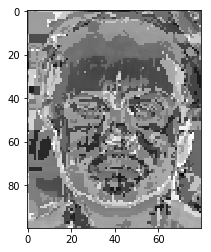

In [60]:
### LETS TEST IT OUT ###

im = img_four
num_vec = 50
x_mean = X_hat.copy()
x_mean = np.zeros((1,8000)).astype(float)
scalars = eigen_projection(im, num_vec)
eig_face = face_of_eig(scalars,num_vec,x_mean)

eig_im = eig_face.reshape(100,80)
plt.imshow(eig_im,cmap = 'gray')
plt.show()


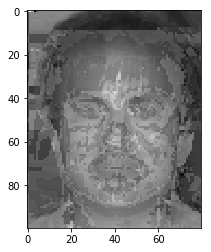

In [61]:
im = img_four
num_vec = 700
x_mean = X_hat.copy()


scalars = eigen_projection(im, num_vec)
eig_face = face_of_eig(scalars,num_vec,x_mean)

eig_im_v2 = eig_face.reshape(100,80)
plt.imshow(eig_im_v2,cmap = 'gray')
plt.show()

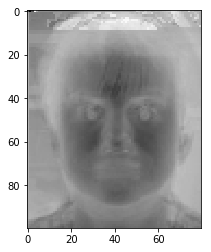

In [62]:
## compare images with a difference

dif = eig_im - eig_im_v2
plt.imshow(dif,cmap = 'gray')
plt.show()

In [ ]:
## routine for the slower implementation
### LETS TEST IT OUT ###

# im = img_four
# num_vec = 6000
# x_mean = X_hat
# #x_mean = mean_smoothed.flatten()
# #x_mean = np.zeros((1,8000)).astype(float)
# basis = new_basis

# scalars = eigen_projection(x_mean, im, basis, num_vec)
# eig_face = face_of_eig(scalars,basis,num_vec,x_mean)

# eig_im = eig_face.reshape(100,80)
# plt.imshow(eig_im,cmap = 'gray')
# plt.show()


Useful Links

http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

https://www.learnopencv.com/eigenface-using-opencv-c-python/
    
https://vismod.media.mit.edu/vismod/classes/mas622-00/datasets/